In [38]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the file
df = pd.read_csv("datasetsfullplatform1.csv", error_bad_lines=False,  warn_bad_lines=False)
#Reading the first five records
print(df.head())

id archive_ident                                              title  \
0  5193        56.936    IBP Barrow Topographic Grid Point Data [Webber]   
1  5366        46.640  Geo-database of MNT, MAT, and Shrub Sites in N...   
2  6850  106.ARCSS117  Glacial Geology Map of the Toolik Lake and Upp...   
3  8602  106.ARCSS400  Barrow Area Information Database (BAID) Geospa...   
4  8602  106.ARCSS400  Barrow Area Information Database (BAID) Geospa...   

                                             summary  archive_note  \
0  <p>This dataset contains International Biologi...           NaN   
1  <p>This dataset contains the location and site...           NaN   
2  <p>This data set consists of a digital glacial...           NaN   
3  <p>The Barrow Area Information Database (BAID)...           NaN   
4  <p>The Barrow Area Information Database (BAID)...           NaN   

            begin_date             end_date  minimum_latitude  \
0  1973-01-01 00:00:00  2001-12-31 23:59:59            70.450 

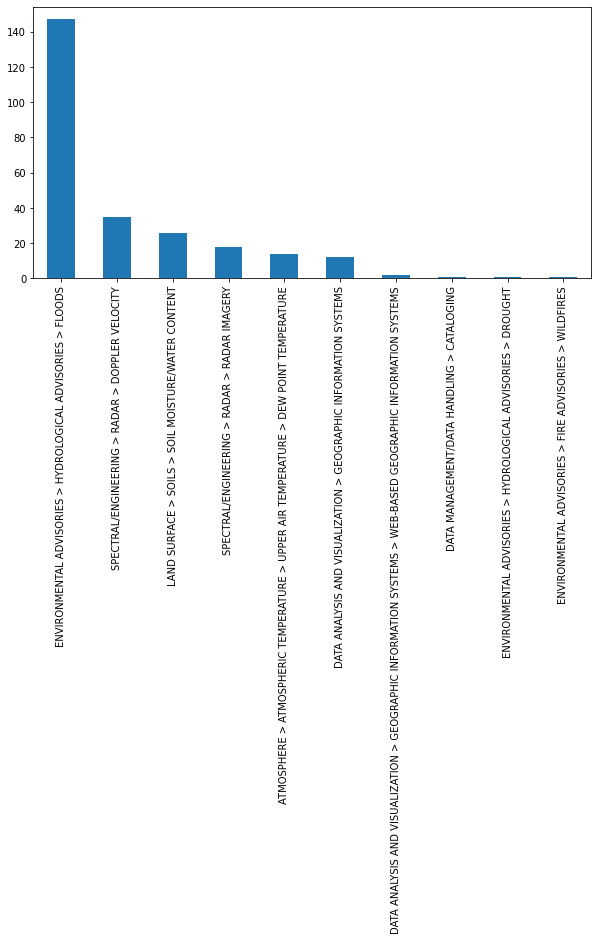

In [39]:
df['name'].value_counts().plot(x = 'name', y ='count', kind = 'bar', figsize = (10,5)  )

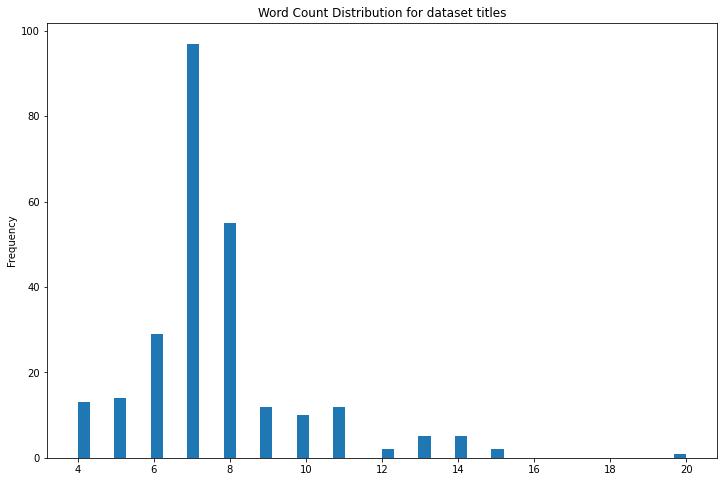

In [40]:
df['word_count'] = df['title'].apply(lambda x: len(str(x).split()))

df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for dataset titles')


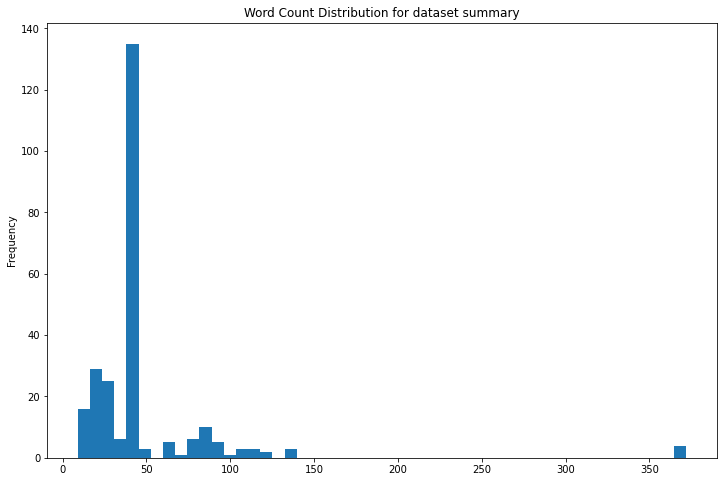

In [41]:
df['word_count'] = df['summary'].apply(lambda x: len(str(x).split()))

df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for dataset summary')


In [42]:
import textblob 
from textblob import TextBlob
blob = TextBlob(str(df['title']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

ModuleNotFoundError: No module named 'textblob'

In [43]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['title'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)


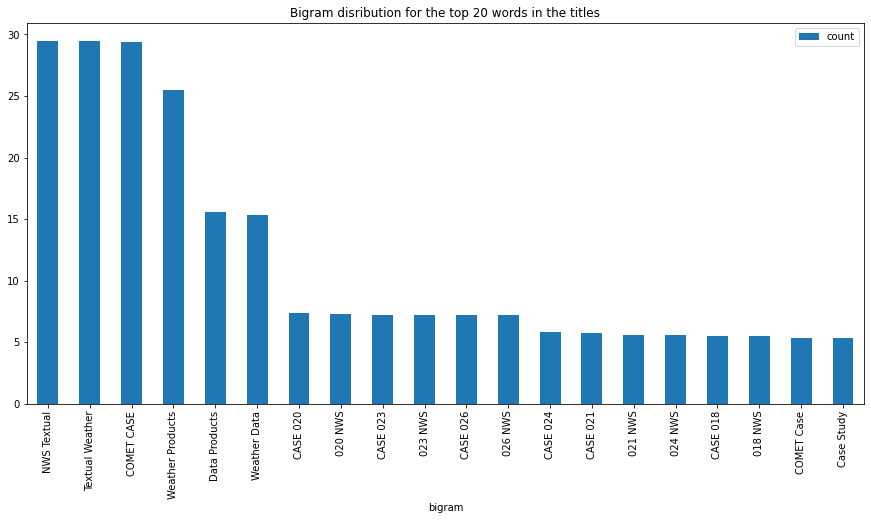

In [44]:
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the titles", figsize = (15,7), )

In [45]:
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['title'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [46]:
def recommend(title, genre):
    
    global rec
    # Matching the genre with the dataset and reset the index
    data = df2.loc[df2['genre'] == name]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]

    movie_indices = [i[0] for i in sig]

    return sig

In [47]:
print(recommend("IBP Barrow Topographic Grid Point Data [Webber]", "LANDSAT"))

UnboundLocalError: local variable 'tfidf_matrix' referenced before assignment